In [32]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import linear_model, naive_bayes, neighbors, svm

ModuleNotFoundError: No module named 'imblearn'

In [6]:
drugs = pd.read_csv('drug200.csv')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


c:\users\sumair\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

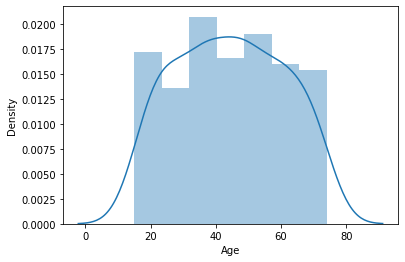

In [7]:
sns.distplot(drugs['Age'])

c:\users\sumair\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na_to_K', ylabel='Density'>

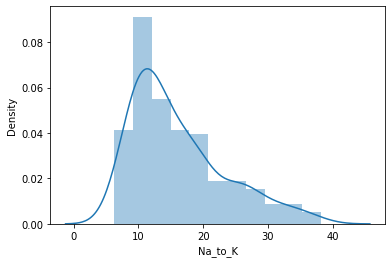

In [8]:
sns.distplot(drugs['Na_to_K'])

In [9]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
age_groups = []
for i in drugs['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')

drugs['AgeGroup'] = age_groups

In [11]:
na_to_k_groups = []
for i in drugs["Na_to_K"]:
    if i <= 10:
        na_to_k_groups.append('5-10')
    if i > 10 and i <= 15:
        na_to_k_groups.append('10-15')
    if i > 15 and i <= 20:
        na_to_k_groups.append('15-20')
    if i > 20 and i <= 25:
        na_to_k_groups.append('20-25')
    if i > 25 and i <= 30:
        na_to_k_groups.append('25-30')
    if i > 30:
        na_to_k_groups.append('30+')

drugs['Na_to_K_groups'] = na_to_k_groups


In [12]:
drugs = drugs[['AgeGroup','Sex','BP','Cholesterol','Na_to_K_groups','Drug']]
drugs.head()

,AgeGroup,Sex,BP,Cholesterol,Na_to_K_groups,Drug
0,0-30,F,HIGH,HIGH,25-30,DrugY
1,40-50,M,LOW,HIGH,10-15,drugC
2,40-50,M,LOW,HIGH,10-15,drugC
3,0-30,F,NORMAL,HIGH,5-10,drugX
4,60+,F,LOW,HIGH,15-20,DrugY


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

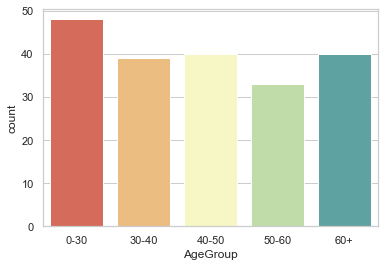

In [13]:
sns.set_theme(style="whitegrid")
sns.countplot(x="AgeGroup", data=drugs, palette='Spectral', order=['0-30', '30-40', '40-50', '50-60', '60+'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

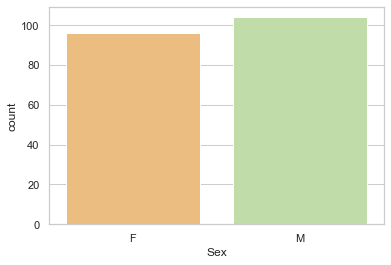

In [14]:
sns.countplot(x='Sex', data = drugs, palette='Spectral')

<AxesSubplot:xlabel='BP', ylabel='count'>

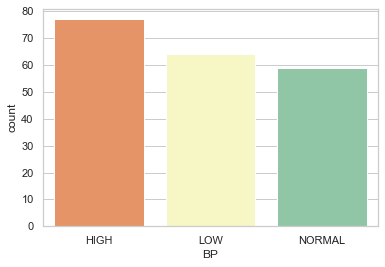

In [15]:
sns.countplot(x="BP", data=drugs, palette='Spectral')

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

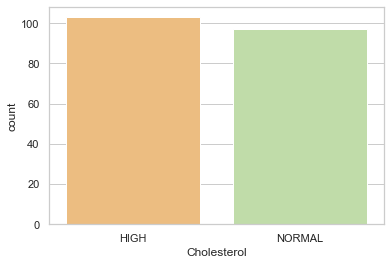

In [16]:
sns.countplot(x="Cholesterol", data=drugs, palette='Spectral')

<AxesSubplot:xlabel='Na_to_K_groups', ylabel='count'>

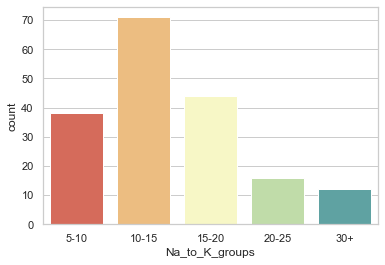

In [17]:
sns.countplot(x='Na_to_K_groups', data=drugs, palette='Spectral', order = ['5-10','10-15','15-20','20-25','30+'])

<AxesSubplot:xlabel='Drug', ylabel='count'>

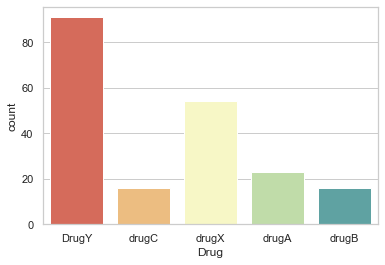

In [18]:
sns.countplot(x="Drug", data=drugs, palette='Spectral')

In [19]:
x, y = drugs.values[:, :-1], drugs.values[:, -1]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [24]:
x_train = pd.get_dummies(pd.DataFrame(x_train))
x_test = pd.get_dummies(pd.DataFrame(x_test))

In [ ]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

[Text(0.5, 0, 'Drug')]

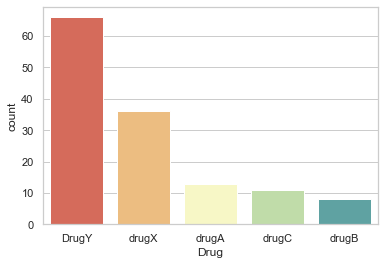

In [25]:
ax = sns.countplot(x=y_train, data=drugs, palette='Spectral')
ax.set(xlabel='Drug')

In [26]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 ['drugX' 'drugB' 'drugA' 'drugX' 'drugA' 'DrugY' 'drugX' 'drugC' 'DrugY'
 'DrugY' 'drugA' 'drugB' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX'
 'drugC' 'DrugY' 'drugC' 'DrugY' 'drugX' 'drugA' 'drugX' 'drugA' 'drugC'
 'drugA' 'drugA' 'drugB' 'drugX' 'drugB' 'drugX' 'drugA' 'DrugY' 'DrugY'
 'drugX' 'drugB' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'drugA' 'drugX'] 
 Accuracy: 98.48484848484848 %


In [28]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 ['drugX' 'drugB' 'drugA' 'drugX' 'drugA' 'DrugY' 'drugX' 'drugC' 'DrugY'
 'DrugY' 'drugA' 'drugB' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX'
 'drugC' 'DrugY' 'drugC' 'DrugY' 'drugX' 'drugA' 'drugX' 'drugA' 'drugC'
 'drugA' 'drugA' 'drugB' 'drugX' 'drugB' 'drugX' 'drugA' 'DrugY' 'DrugY'
 'drugX' 'drugB' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'drugA' 'drugX'] 
 Accuracy: 98.48484848484848 %


In [29]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 ['drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'drugC' 'DrugY'
 'DrugY' 'drugA' 'drugX' 'DrugY' 'drugA' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX'
 'drugC' 'DrugY' 'drugC' 'DrugY' 'drugX' 'DrugY' 'drugX' 'DrugY' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugX' 'drugA' 'DrugY' 'DrugY'
 'drugX' 'drugA' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'DrugY' 'drugA' 'drugX'] 
 Accuracy: 69.6969696969697 %


In [30]:
svm =svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_acc = 100*svm.score(x_test, y_test)
print('SVM Predictions: \n', svm.predict(x_test), '\n Accuracy:', svm_acc, '%')

SVM Predictions: 
 ['drugX' 'drugB' 'drugA' 'drugX' 'drugA' 'DrugY' 'drugX' 'drugC' 'DrugY'
 'DrugY' 'drugA' 'drugB' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX'
 'drugC' 'DrugY' 'drugC' 'DrugY' 'drugX' 'drugA' 'drugX' 'drugA' 'drugC'
 'drugA' 'drugA' 'drugB' 'drugX' 'drugB' 'drugX' 'drugA' 'DrugY' 'DrugY'
 'drugC' 'drugB' 'drugX' 'DrugY' 'drugB' 'DrugY' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'drugB' 'DrugY' 'DrugY' 'drugX' 'DrugY' 'DrugY' 'drugX' 'DrugY'
 'drugX' 'drugA' 'drugX'] 
 Accuracy: 100.0 %


In [31]:
pd.DataFrame(data={'Model': ['Logistic Regression','Gaussian Naive Bayes', 'K_Nearest Neighbours', 'Support Vector Machine(SVM)'], 'Accuracy %':[log_reg_acc, nb_acc, knn_acc, svm_acc]})

,Model,Accuracy %
0,Logistic Regression,98.484848
1,Gaussian Naive Bayes,98.484848
2,K_Nearest Neighbours,69.696970
3,Support Vector Machine(SVM),100.000000
